<a href="https://colab.research.google.com/github/MNITImpostors/SkinVision/blob/master/preproecess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
from tqdm import tqdm
import gc
from functools import partial
from sklearn import metrics
from collections import Counter
import json
import itertools

%matplotlib inline

In [2]:
from skimage.color import rgb2grey
from sklearn.cluster import KMeans

In [3]:
def mask(img):
  cluster_img=(KMeans(n_clusters=2).fit(rgb2grey(img).reshape(-1,1)).labels_.reshape(224,224))
  masks=[cluster_img==i for i in range(2)]
  a=(rgb2grey(img)*masks[0]).mean()
  b=(rgb2grey(img)*masks[1]).mean()
  x=0
  if a<b :
    x=0
  else:
    x=1  
  y=img.copy() 
  for i in range(3):
    y[:,:,i]*=masks[x]
  return y    
   


In [12]:
read = lambda imname: np.asarray(Image.open(imname).resize((224,224),Image.ANTIALIAS).convert("RGB"))
x=read('pranav.jpg')


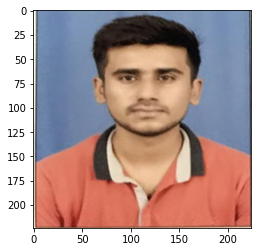

In [13]:
plt.imshow(x)


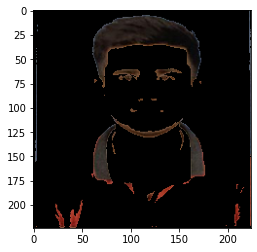

In [14]:
plt.imshow(mask(x))

In [ ]:
plt.imshow(mask(x))
for file in os.listdir('/content/drive/MyDrive/data/train/benign'):
  dest='/content/data/train/benign/'+file
  cv2.imwrite(dest,cv2.cvtColor(mask(read('/content/drive/MyDrive/data/train/benign/'+file)), cv2.COLOR_RGB2BGR))
for file in os.listdir('/content/drive/MyDrive/data/train/malignant'):
  dest='/content/data/train/malignant/'+file
  cv2.imwrite(dest,cv2.cvtColor(mask(read('/content/drive/MyDrive/data/train/malignant/'+file)), cv2.COLOR_RGB2BGR))


In [77]:
for file in os.listdir('/content/drive/MyDrive/data/test/benign'):
  dest='/content/data/test/benign/'+file
  cv2.imwrite(dest,cv2.cvtColor(mask(read('/content/drive/MyDrive/data/test/benign/'+file)), cv2.COLOR_RGB2BGR))
for file in os.listdir('/content/drive/MyDrive/data/test/malignant'):
  dest='/content/data/test/malignant/'+file
  cv2.imwrite(dest,cv2.cvtColor(mask(read('/content/drive/MyDrive/data/test/malignant/'+file)), cv2.COLOR_RGB2BGR))

In [81]:
import shutil
shutil.make_archive('data', 'zip', 'data')

'/content/data.zip'